In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Import API key
from api_keys import weather_api_key

# Use citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm count exceeds 500
len(cities)

630

In [7]:
# fetch weather data
url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + city).json()
print(response)

{'coord': {'lon': -67.58, 'lat': -39.03}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 51.8, 'feels_like': 45.52, 'temp_min': 51.8, 'temp_max': 51.8, 'pressure': 1009, 'humidity': 62}, 'visibility': 7000, 'wind': {'speed': 6.93, 'deg': 50}, 'clouds': {'all': 100}, 'dt': 1591469583, 'sys': {'type': 1, 'id': 8310, 'country': 'AR', 'sunrise': 1591443822, 'sunset': 1591478087}, 'timezone': -10800, 'id': 3855065, 'name': 'General Roca', 'cod': 200}


In [8]:
# create a list of cities
city_name_log = []
city_id_log = []
unknown_cities = []
country_name_log=[]
lat = []
long=[]
temp=[]
humidity = []
cloudiness = []
wind_speed = []


# Build query URL
#query_url = url + "appid=" + weather_api_key + "&q=" + city

query_url = f"{url}appid={weather_api_key}&units={units}&q="

for city in cities:
    try: 
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        cloudiness.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        city_name_log.append(response['name'])
        city_id_log.append(response['id'])
        country_name_log.append(response["sys"]["country"])
        print(f"City Name and Number  = {response['name']}, {response['id']}")
        #print(f"Cities found are:City Name = {city_name_log} City Number = {city_id_log}")

    except: 
        unknown_cities.append(city) 

        

City Name and Number  = Lebu, 3883457
City Name and Number  = Rikitea, 4030556
City Name and Number  = Khatanga, 2022572
City Name and Number  = Hong Kong, 1819729
City Name and Number  = Skjervøy, 777682
City Name and Number  = George Town, 1735106
City Name and Number  = Saint George, 5546220
City Name and Number  = Dikson, 1507390
City Name and Number  = Bethel, 5282297
City Name and Number  = Horasan, 745527
City Name and Number  = Narsaq, 3421719
City Name and Number  = Mataura, 6201424
City Name and Number  = Saint-Philippe, 935215
City Name and Number  = Dire Dawa, 338832
City Name and Number  = Anori, 3665315
City Name and Number  = Severo-Kuril'sk, 2121385
City Name and Number  = Ushuaia, 3833367
City Name and Number  = Cherskiy, 2126199
City Name and Number  = Avarua, 4035715
City Name and Number  = Fairbanks, 5861897
City Name and Number  = Ayní, 1222222
City Name and Number  = Hilo, 5855927
City Name and Number  = Harbour Breton, 5970478
City Name and Number  = Chui, 344306

City Name and Number  = Qaqortoq, 3420846
City Name and Number  = Port Lincoln, 2063036
City Name and Number  = Resende, 3451668
City Name and Number  = Wad Rāwah, 364071
City Name and Number  = Pitimbu, 3391889
City Name and Number  = New Norfolk, 2155415
City Name and Number  = Shahr-e Bābak, 115781
City Name and Number  = Taltal, 3870243
City Name and Number  = Kampen, 2753106
City Name and Number  = Faya, 110690
City Name and Number  = Balikpapan, 1650527
City Name and Number  = Kruisfontein, 986717
City Name and Number  = Sorong, 1626542
City Name and Number  = Jalu, 86049
City Name and Number  = Kemijärvi, 653272
City Name and Number  = Meadow Lake, 5478673
City Name and Number  = Goderich, 5962442
City Name and Number  = Cabedelo, 3404558
City Name and Number  = Tucumã, 3385980
City Name and Number  = Okahandja, 3354898
City Name and Number  = Mar del Plata, 3430863
City Name and Number  = Marakkanam, 1263564
City Name and Number  = Ponta do Sol, 2264557
City Name and Number  = 

City Name and Number  = Alyangula, 2079582
City Name and Number  = Kutum, 371745
City Name and Number  = Brasília de Minas, 3469057
City Name and Number  = Nome, 5870133
City Name and Number  = Egvekinot, 4031742
City Name and Number  = Alexandria, 361058
City Name and Number  = Cap Malheureux, 934649
City Name and Number  = Labuhan, 8079926
City Name and Number  = Payakumbuh, 1631905
City Name and Number  = Makakilo City, 5850554
City Name and Number  = San Buenaventura, 3987500
City Name and Number  = Mezen', 527321
City Name and Number  = Lata, 2738381
City Name and Number  = Kondinskoye, 1502697
City Name and Number  = Tselinnoye, 1489138
City Name and Number  = Dingzhou, 1812728
City Name and Number  = Khanbari, 1283217
City Name and Number  = Bambous Virieux, 1106677
City Name and Number  = Katangli, 2122783
City Name and Number  = Nhamundá, 3393929
City Name and Number  = Baghdad, 98182
City Name and Number  = Dokri, 1179660
City Name and Number  = Bereda, 3105522
City Name and 

In [9]:
print(f"Error, some cities were not found:\n {unknown_cities}\n")


Error, some cities were not found:
 ['taolanaro', 'amderma', 'turtkul', 'karaul', 'tsihombe', 'blonduos', 'samusu', 'bargal', 'solovetskiy', 'kracheh', 'illoqqortoormiut', 'arandelovac', 'belushya guba', 'barentsburg', 'guekedou', 'uzumlu', 'mys shmidta', 'rawannawi', 'marv dasht', 'sentyabrskiy', 'tabiauea', 'chagda', 'vaitupu', 'nizhneyansk', 'tubruq', 'mullaitivu', 'haibowan', 'toliary', 'meyungs', 'attawapiskat', 'umzimvubu', 'karamea', 'barawe', 'grand river south east', 'louisbourg', 'khonuu', 'paradwip', 'burica', 'mahadday weyne', 'gurskoye', 'saleaula', 'tumannyy', 'dolbeau', 'khormuj', 'temaraia', 'naftah', 'vestbygda', 'a', 'crab hill', 'dalinghe']



In [10]:
# create dataframe with relevant data
d = {"City Name" : city_name_log, "Country": country_name_log, "City ID": city_id_log, "Latitude": lat, "Longitude": long, "Max Temperature": temp,
     "Humidity": humidity, "Cloudiness (%)": cloudiness, "Wind Speed": wind_speed}

df = pd.DataFrame(d)
df.head()

,City Name,Country,City ID,Latitude,Longitude,Max Temperature,Humidity,Cloudiness (%),Wind Speed
0,Lebu,CL,3883457,-37.62,-73.65,52.83,82,100,8.48
1,Rikitea,PF,4030556,-23.12,-134.97,75.20,84,100,30.02
2,Khatanga,RU,2022572,71.97,102.50,37.81,73,100,11.65
3,Hong Kong,HK,1819729,22.29,114.16,84.00,83,100,11.01
4,Skjervøy,NO,777682,70.03,20.97,54.19,71,0,14.67


In [11]:
Humidity_check =df["Humidity"].max()
print(Humidity_check)

100


In [12]:
#  Get the indices of cities that have humidity over 100% if any
Humidity_df = df.loc[df["Humidity"]>100]
print(Humidity_df)
# Drop data for cities with humidity over 100% if any
df.drop(df.index[df.Humidity > 100])


Empty DataFrame
Columns: [City Name, Country, City ID, Latitude, Longitude, Max Temperature, Humidity, Cloudiness (%), Wind Speed]
Index: []


,City Name,Country,City ID,Latitude,Longitude,Max Temperature,Humidity,Cloudiness (%),Wind Speed
0,Lebu,CL,3883457,-37.62,-73.65,52.83,82,100,8.48
1,Rikitea,PF,4030556,-23.12,-134.97,75.20,84,100,30.02
2,Khatanga,RU,2022572,71.97,102.50,37.81,73,100,11.65
3,Hong Kong,HK,1819729,22.29,114.16,84.00,83,100,11.01
4,Skjervøy,NO,777682,70.03,20.97,54.19,71,0,14.67
...,...,...,...,...,...,...,...,...,...
575,Lagoa,PT,3372964,39.05,-27.98,63.23,73,18,6.62
576,Rafaela,AR,3839479,-31.25,-61.49,68.00,51,27,1.99
577,Atbasar,KZ,1526038,51.80,68.33,58.35,56,0,7.34
578,Portales,US,5484874,34.19,-103.33,91.99,29,1,18.34


In [13]:

# Export the City_Data into a csv
df.to_csv("../output_data/WeatherPy_Log.csv", index=False)


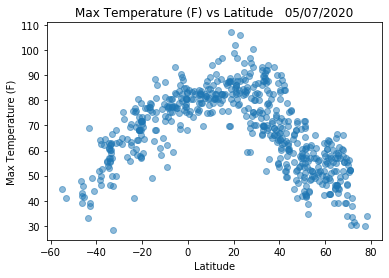

This plot shows the relationship between average temperature and latitude for the cities generated. 
Some coordinates were missing data on the weather website and they are listed above.
There is a visible linear relationship between Latitude and temperature


In [48]:
# Create plots for temperature vs latitude
Temp_Lat= plt.scatter(lat, temp,  alpha=0.5)
plt.title('Max Temperature (F) vs Latitude   05/07/2020')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.show()
print(f"This plot shows the relationship between average temperature and latitude for the cities generated. \nSome coordinates were missing data on the weather website and they are listed above.")
print(f"There is a visible linear relationship between Latitude and temperature")

fig = Temp_Lat.get_figure()
fig.savefig("../output_data/Temp_Lat.png")



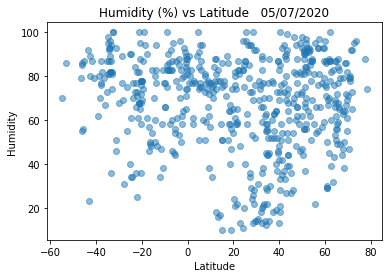

This plot shows the relationship between humidity and latitude for the cities generated. 
Some coordinates were missing data on the weather website and they are listed below.
The maximum humidity is 100% and no city recorded a humidity greater than 100%


In [49]:
#Create plot for Humidity vs Latitude
Hum_Lat=plt.scatter(lat, humidity,  alpha=0.5)
plt.title('Humidity (%) vs Latitude   05/07/2020')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.show()
print(f"This plot shows the relationship between humidity and latitude for the cities generated. \nSome coordinates were missing data on the weather website and they are listed below.")
print(f"The maximum humidity is 100% and no city recorded a humidity greater than 100%")


fig = Hum_Lat.get_figure()
fig.savefig("../output_data/Hum_Lat.png")

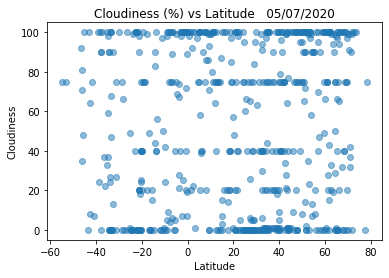

This plot shows the relationship between cloudiness and latitude for the cities generated. 
Some cities were missing data on the weather website and they are listed below
There is no evident relationship between Cloudiness and latitude.


In [50]:
# create plot for Cloudiness vs Latitude

Cloud_Lat = plt.scatter(lat, cloudiness,  alpha=0.5)
plt.title('Cloudiness (%) vs Latitude   05/07/2020')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.show()
print(f"This plot shows the relationship between cloudiness and latitude for the cities generated. \nSome cities were missing data on the weather website and they are listed below")
print(f"There is no evident relationship between Cloudiness and latitude.")
fig = Cloud_Lat.get_figure()
fig.savefig("../output_data/Cloud_Lat.png")

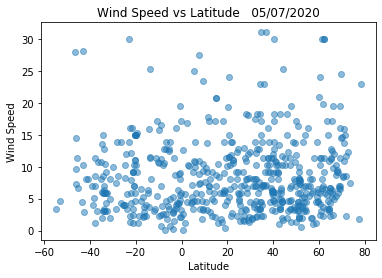

This plot shows the relationship between wind speed and latitude for the cities generated. 
 some cities were missing data on the weather website and they are listed below


In [51]:
# Create plot for wind speed vs latitude

Wind_Lat = plt.scatter(lat, wind_speed,  alpha=0.5)
plt.title('Wind Speed vs Latitude   05/07/2020')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.show()
print(f"This plot shows the relationship between wind speed and latitude for the cities generated. \n some cities were missing data on the weather website and they are listed below")

fig = Wind_Lat.get_figure()
fig.savefig("../output_data/Wind_Lat.png")


In [52]:
# Create Northern and Southern Hemisphere DataFrames
df_North = df.loc[df["Latitude"]>0]
df_South = df.loc[df["Latitude"]<0]

# OPTIONAL: Create a function to create Linear Regression plots
Regression_Data_Y=[df_South['Max Temperature'], df_North['Max Temperature'], df_South["Humidity"],
                   df_North["Humidity"], df_South["Cloudiness (%)"], df_North["Cloudiness (%)"], 
                   df_South["Wind Speed"], df_North["Wind Speed"]]

Regression_Data_X = [df_South['Latitude'], df_North['Latitude'], df_South['Latitude'], df_North['Latitude'],
df_South['Latitude'],df_North['Latitude'], df_South['Latitude'], df_North['Latitude']]

Regression_Data_Labels = ["Max Temperature South", "Max Temperature North", "Humidity South", "Humidity North",
                          "Cloudiness (%) South","Cloudiness (%) North", "Wind Speed South", "Wind Speed North"]


Plot for the linear regression of Max Temperature South and latitude.
The r-squared for Max Temperature South is: 0.6381721591798584


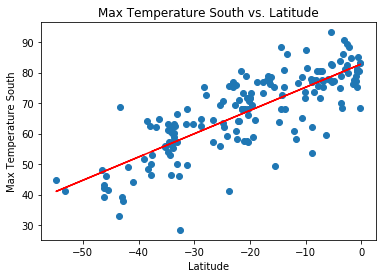



Plot for the linear regression of Max Temperature North and latitude.
The r-squared for Max Temperature North is: 0.6208965448888829


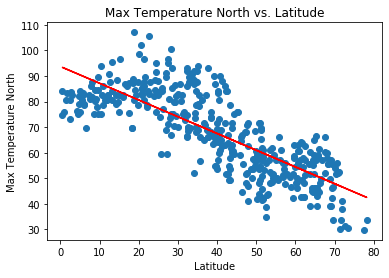



Plot for the linear regression of Humidity South and latitude.
The r-squared for Humidity South is: 0.005961677249830854


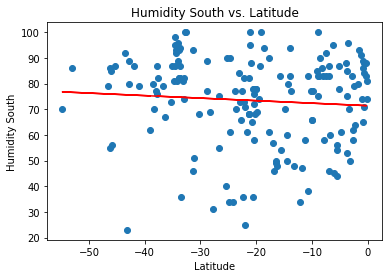



Plot for the linear regression of Humidity North and latitude.
The r-squared for Humidity North is: 0.008120805526035734


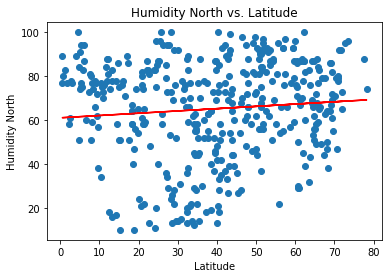



Plot for the linear regression of Cloudiness (%) South and latitude.
The r-squared for Cloudiness (%) South is: 0.0031853150775312147


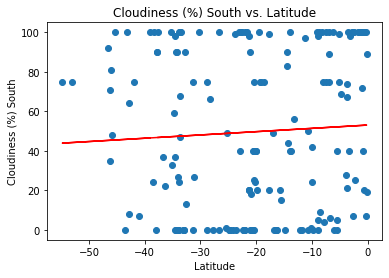



Plot for the linear regression of Cloudiness (%) North and latitude.
The r-squared for Cloudiness (%) North is: 0.001710664511154624


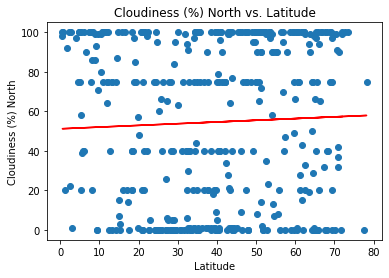



Plot for the linear regression of Wind Speed South and latitude.
The r-squared for Wind Speed South is: 0.007455274643794955


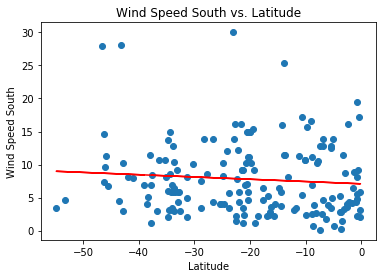



Plot for the linear regression of Wind Speed North and latitude.
The r-squared for Wind Speed North is: 0.0019195655125998693


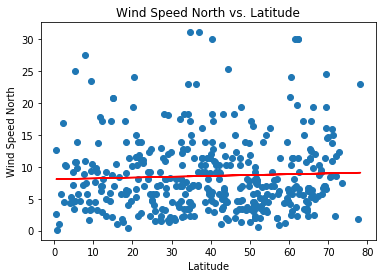

In [54]:
#Function to Calculate the linear regressions and produce plots for them
for i in range(8):

    x_values = Regression_Data_X[i]
    y_values = Regression_Data_Y[i]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    Data = plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.title((Regression_Data_Labels[i]) + ' vs. Latitude')

    #plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.ylabel(Regression_Data_Labels[i])
    plt.xlabel('Latitude')

    print(f"Plot for the linear regression of {Regression_Data_Labels[i]} and latitude.")
    print(f"The r-squared for {Regression_Data_Labels[i]} is: {rvalue**2}")
    plt.show()

    fig = Data.get_figure()
    filename = (f"../output_data/linear regression of {Regression_Data_Labels[i]} vs Latitude.png")
    fig.savefig(filename)
    plt.show()
    print(f"\n")


In [55]:
print(f"   The first two plots show the relationship between temperature and latitude. There is an evident \n\
visual correlation and the r**2 values of .64 and .62 respectively give a fairly high confidence that temperature \n\
is strongly affected by latitude, especially in the Northern hemisphere. There are some outliers, especially in the \n\
Southern Hemisphere. Presumably these indicate factors other than Latitude which also influence temperature.")
    
print(f"    The second pair of plots show the relationship between Humidity and Latitude. There is no consistent pattern and \n\
the r **2 values are also quite low.")
      
print(f"    The third pair of plots show the relationship between Cloudiness and Latitude. There is no consistent pattern and \n\
the r **2 values are also quite low. The data is affected by a large number of data points at both 0 and 100%.")

print(f"    The final pair of plots show the relationship between Wind Speed and Latitude. The data appear visually \n\
to cluster around the linear regression line, but the r **2 values are still quite low, implying no linear \n\
correlation. The Northern Hemisphere has generally higher wind speeds and more outliers than the Southern Hemisphere.")

   The first two plots show the relationship between temperature and latitude. There is an evident 
visual correlation and the r**2 values of 63.8 and 62.1 respectively give a fairly high confidence that temperature 
is strongly affected by latitude, especially in the Northern hemisphere. There are some outliers, especially in the 
Southern Hemisphere. Presumably these indicate factors other than Latitude which also influence temperature.
    The second pair of plots show the relationship between Humidity and Latitude. There is no consistent pattern and 
the r **2 values are also quite low.
    The third pair of plots show the relationship between Cloudiness and Latitude. There is no consistent pattern and 
the r **2 values are also quite low. The data is affected by a large number of data points at both 0 and 100%.
    The final pair of plots show the relationship between Wind Speed and Latitude. The data appear visually 
to cluster around the linear regression line, but the r **2 val

In [ ]:
# Create Northern and Southern Hemisphere DataFrames
# df_North = df.loc[df["Latitude"]>0]
# df_South = df.loc[df["Latitude"]<0]

# # OPTIONAL: Create a function to create Linear Regression plots
# Regression_Data_X_South=[df_South['Average Temperature'], df_South["Humidity"], df_South["Cloudiness (%)"], 
#                    df_South["Wind Speed"]]
# Regression_Data_Y_South = df_South['Latitude']

# Regression_Data_X_North=[df_North['Average Temperature'], df_North["Humidity"], df_North["Cloudiness (%)"], 
#                    df_North["Wind Speed"]]
# Regression_Data_Y_North = df_North['Latitude']

# Regression_Data_Labels = ["Avg Temperature", "Humidity %", "Cloudiness (%)", "Wind Speed"]



In [ ]:
# #Choose which hemisphere to plot
# Regression_Data_X = Regression_Data_X_South
# Regression_Data_Y = Regression_Data_Y_South

In [ ]:
# print(f"Plotting for the Southern Hemisphere\n")
# for i in range(4):

#     x_values = Regression_Data_X[i]
#     y_values = Regression_Data_Y
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#     regress_values = x_values * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#     plt.scatter(x_values,y_values)
#     plt.plot(x_values,regress_values,"r-")
#     plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#     plt.xlabel(Regression_Data_Labels[i])
#     plt.ylabel('Latitude')
#     print(f"The r-squared for {Regression_Data_Labels[i]} is: {rvalue**2}")

#     plt.show()
#     print(f"\n")

In [ ]:
#Reset the Data to plot the Northenr Hemisphere
# Regression_Data_X = Regression_Data_X_North
# Regression_Data_Y = Regression_Data_Y_North

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# print(f"Plotting for the Northern Hemisphere\n")
# for i in range(4):
#     x_values = Regression_Data_X[i]
#     y_values = Regression_Data_Y
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#     regress_values = x_values * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#     plt.scatter(x_values,y_values)
#     plt.plot(x_values,regress_values,"r-")
#     plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#     plt.xlabel(Regression_Data_Labels[i])
#     plt.ylabel('Latitude')
#     print(f"The r-squared for {Regression_Data_Labels[i]} is: {rvalue**2}")

#     plt.show()
#     print(f"\n")
    

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression